# Cluster similar Houses

# Again, on the same dataset. Cluster similar houses together. Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt

1.Data cleaning & getting rid of irrelevant information before clustering
2.Finding the optimal value of k
3.Storing cluster to which the house belongs along with the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt", index_col='Unnamed: 0')


In [3]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [4]:
df.shape

(645, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [6]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [7]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [9]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\91938\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
import sklearn

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [12]:
mm = MinMaxScaler()


In [13]:
data_trans = mm.fit_transform(df)

In [14]:
kmeans = KMeans(n_clusters=3)

In [15]:
kmeans.fit(data_trans)

KMeans(n_clusters=3)

In [16]:
df[kmeans.labels_ == 2]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
3,1138.560,5,7,2,2,1,58000
8,757.854,5,14,1,0,1,48000
11,668.904,4,11,1,1,1,31000
12,711.600,4,7,2,1,1,29002
14,818.340,4,13,2,2,1,48000
...,...,...,...,...,...,...,...
624,711.600,1,1,3,1,1,12000
635,996.240,3,5,3,1,1,28000
638,843.246,2,18,1,1,1,53000
645,377.148,4,10,1,1,1,24800


In [17]:
df[kmeans.labels_ == 1]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
7,1352.040,5,7,3,2,1,58000
...,...,...,...,...,...,...,...
640,1266.648,6,7,3,2,2,40000
641,1707.840,9,9,4,2,2,60000
644,1359.156,7,15,3,2,2,45000
647,1707.840,3,14,3,2,2,65000


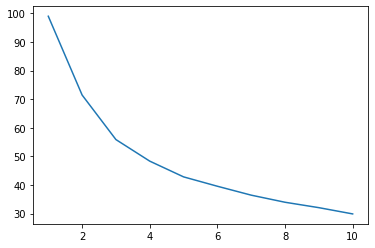

In [18]:
cs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++", max_iter=300)
    kmeans.fit(data_trans)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.show()